## 기하학적 변환

영상을 구성하는 픽셀의 배치 구조를 변경하여 전체 영상의 모영을 변환 (픽셀값에 주목). 영상의 밝기 및 명암비 조절, 필터링 등이 픽셀 위치를 고정하고 픽셀 값을 변경한 것과 달리, 기하학적 변환은 **픽셀 값은 그대로 유지한면서 위치를 변경**

입력 영상에서 (x, y) 좌표의 픽셀을 결과 영상의 (x', y')좌표로 변환하는 방법을 고유한 함수로 표현
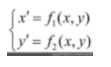

* f1, f2를 어떻게 정의하는지에 따라 영상의 크기를 변경할 수도, 영상을 회전시킬 수도 있음

ex) Image registration, removal of geometric distortion 

## 1. 어파인 변환

영상의 평행이동, 회전, 크기 변환, 전단 변환 등을 통칭

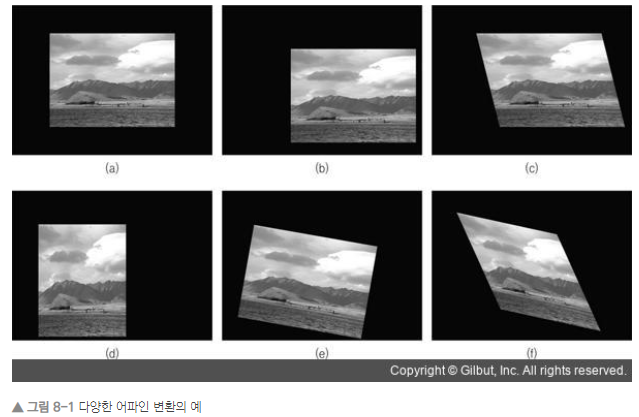

<br/>
<br/>

다음과 같이 행렬을 이용하여 하나의 **행렬 곱셈 형태**로 표현함

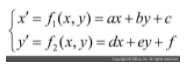

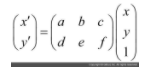

  * 2x3 행렬이 어파인 변환 행렬 (실수형)
  
<br/>
<br/>
  
  
최소 3 점의 이동 관계를 알면 입력 영상을 어파인 변환 결과 영상으로 변환시키는 어파인 변환 행렬을 구할 수 있음

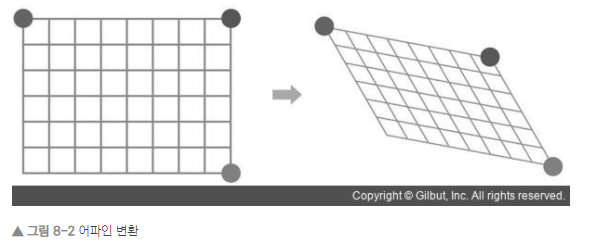

 * 점 하나의 이동 관계로부터 x, y좌표에 대한 변환 수식 2개를 얻을 수 있음
 * 점 3개의 이동 관계로부터 총 6개의 방정식을 구함
 * 마지막 점은 자동으로 결정됨 (어파인 변환에 의해 직사각형 영상이 평행사변형으로 변환된다는 결과를 알고 있기 때문)

#### 어파인 변환 코드

cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None) -> dst

* M : 어파인 변환 행렬. 실수형
* dsize : 출력 영상의 크기 지정. (w, h) 튜플, (0, 0)이면 src와 같은 크기
* flags : interpolation. default = cv2.INTER_LINEAR
* borderValue : 변환으로인해 새롭게 생겨나는 공간을 어떤식으로 채울지 결정

### 이동 변환

x, y 축 방향으로 얼마나 이동하는 지 변위를 지정

가로, 세로 방향으로 영상을 특정 크기만큼 이동시키는 변환 (shift 연산)

행렬에 대한 곱셈 수식 하나로 표현하는 것이 효율적 (어파인 변환 행렬 => numpy.ndarray)

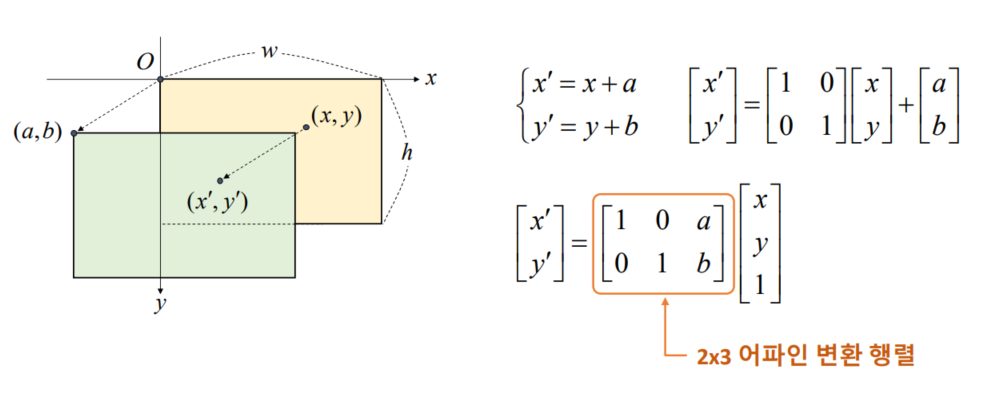

In [ ]:
import sys
import numpy as np
import cv2


src = cv2.imread('C:/Users/ky_moon/Desktop/vision/ch05/tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

aff = np.array([[1, 0, 200],
                [0, 1, 100]], dtype=np.float32)  # x축으로 200, y축으로 100

dst = cv2.warpAffine(src, aff, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)  # 입력 영상의 픽셀값이 복사되지 않은 부분은 검은색으로 채워짐
cv2.waitKey()
cv2.destroyAllWindows()

### 전단 변환 (Shear Transformation)

층 밀림 변환. x, y축 방향에 대해 따로 정의

직사각형 형태의 영상을 한 쪽으로 밀어서 평행사편형 모양으로 변환

**scaling factor m**을 지정해서 밀림의 정도를 결정함

영상의 픽셀을 가로/세로 방향으로 이동시키지만, **픽셀이 어느 위치에 있는가에 따라 이동 정도가 달라짐** (원점은 이동하지 않음)

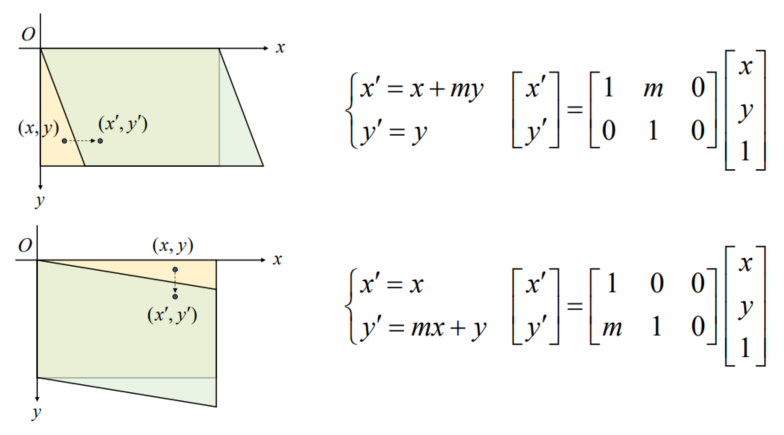

  1. y 좌표가 증가함에 따라 영상을 가로 방향으로 조금씩 밀음
  2. x 좌표가 증가함에 따라 영상을 세로 방향으로 조금씩 밀음

In [1]:
import sys
import numpy as np
import cv2


src = cv2.imread('C:/Users/ky_moon/Desktop/vision/ch05/tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

aff = np.array([[1, 0.5, 0],
                [0, 1, 0]], dtype=np.float32)

h, w = src.shape[:2]
dst = cv2.warpAffine(src, aff, (w + int(h * 0.5), h))  # 반드시 실수값을 갖도록해야함

cv2.imshow('src', src)
cv2.imshow('dst', dst)  
cv2.waitKey()
cv2.destroyAllWindows()

## 2. 영상의 확대와 축소

### 크기 변환 (Scale Transformation)

영상의 전체적 크기를 확대/축소하는 변환. 컴퓨터 비전 프로그래밍에서 매우 자주 발생하는 작업.
 * 몇 몇 영상 인식 시스템은 정해진 크기의 영상만을 입력으로 받음
 * 복잡한 알고리즘을 수행하기에 앞서 연산 시간을 단축하기 위해 영상의 크기를 줄임

x축, y축 방향으로의 스케일 비율(scale factor)을 지정

<br/>

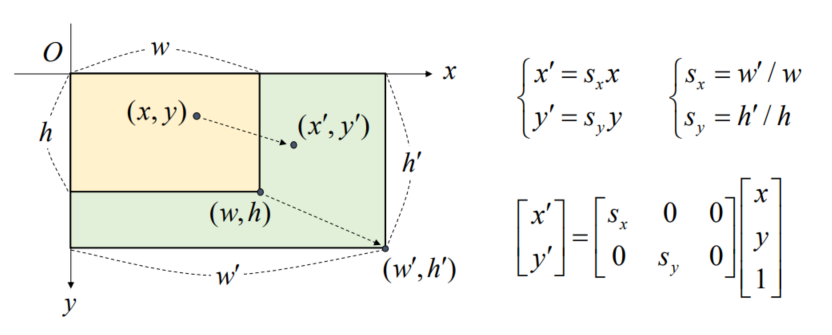

* 원본은 w x h, 결과 영상은 w' x h'크기

* 가로 방향으로의 크기 변환 비율 Sx는 w' / w 수식으로 계산, 세로 방향으로의 크기 변환 비율 Sy는 h' / h

* Sx/Sy가 1보다 크면 영상이 확대, 작으면 축소

#### 크기 변환 코드

실제 영상 처리 시스템에서 빈번하게 표현되기 때문에 위처럼 어파인 변환 행렬을 정의하기 보다는 간단하게 크기를 변경할 수 있는 resize 함수를 이용함

cv2.resize(src, dsize, dst=None, fx=None, fy=None, interpolation=None) -> dst

* dsize : (0, 0)이면 fx, fy의 값을 이용하여 결정
* fx, fy : 스케일 비율 (dsize값이 0일때 유효) 
  * 둘 중 하나는 반드시 지정해줘야 함
* interpolation : default = cv2.INTER_LINEAR, 결과 영상의 퀄리티에 영향을 끼침

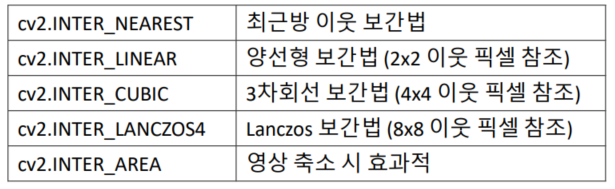

In [ ]:
import sys
import numpy as np
import cv2


src = cv2.imread('C:/Users/ky_moon/Desktop/vision/ch05/rose.bmp') # src.shape=(320, 480)

if src is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)  # fx, fy에 의해 자동으로 dsize 결정
dst2 = cv2.resize(src, (1920, 1280))  # cv2.INTER_LINEAR, dsize 직접 지정 (fx, fy 지정 x)
dst3 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC)  # 3차 회선 보간법 이용
dst4 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)  #

cv2.imshow('src', src)
cv2.imshow('dst1', dst1[500:900, 400:800])
cv2.imshow('dst2', dst2[500:900, 400:800])
cv2.imshow('dst3', dst3[500:900, 400:800])
cv2.imshow('dst4', dst4[500:900, 400:800])
cv2.waitKey()
cv2.destroyAllWindows()

**영상을 축소할시 디테일이 사라지는 경우가 발생할 수 있음** (특히 한번에 작은 사이즈로 축소시키는 경우 두드러짐)

입력 영상을 부드럽게 필터링한 후 축소 or 다단계 축소, INTER_AREA 보간법 권장

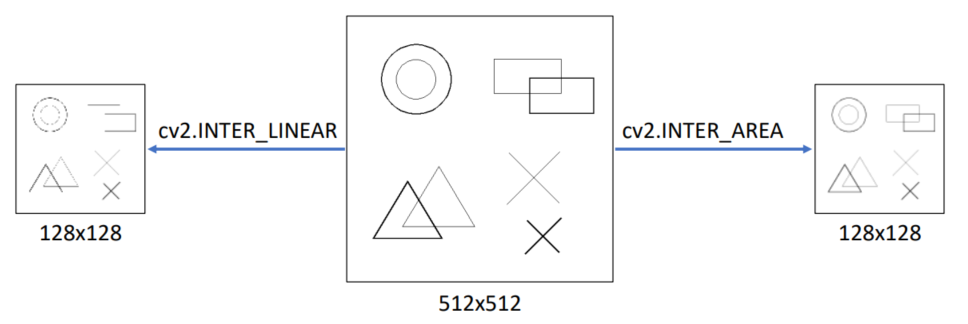

## 3. 영상의 대칭

### 대칭 변환 (filp, reflection)

입력 영상과 같은 크기의 결과 영상을 반환

입력 영상의 픽셀과 결과 영상의 픽셀이 일대일로 대응되기 때문에 보간법이 필요 x

<br/>

좌우 대칭 변환에 의한 좌표 변환 수식

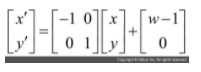

원본 영상을 x축 방향으로 -1배 크기 변환한 후, x축 방향으로 w-1만큼 이동변환 (어파인 변환의 일종임)

#### 대칭 변환 코드

cv2.flip(src, flipCode, dst=None) -> dst

* flipCode : 대칭 방향 지정

### 이미지 피라미드

이미지의 **스케일과 해상도를 조절**하는 작업으로 동일한 이미지를 가지고 여러 다양한 크기로 조절하여 작업. **하나의 영상에 대해 다양한 해상도/스케일의 영상 세트 구성**. 보통 가우시안 블러링 & 다운 샘플링 형태로 구성함


Ex)
**이미지를 여러 스케일에 걸쳐서 분석**하는 가장 기본적인 방법으로 입력 이미지의 크기를 단계적으로 축소(변화)시켜 가며 필요한 분석 작업을 수행. 이때 이렇게 생성된 일련의 이미지 집합이 이미지 피라미드

확보한 얼굴 이미지에서의 얼굴 크기와 다른 이미지에서 보이는 얼굴 크기가 다를 수 있기 때문에 **탐색 대상 이미지의 해상도를 다단계로** 만들어 각 단계에서 얼굴을 탐색. 특정 해상도에서 검출되지 않는 특징을 다른 해상도에서는 쉽게 감지할 수도 있음.


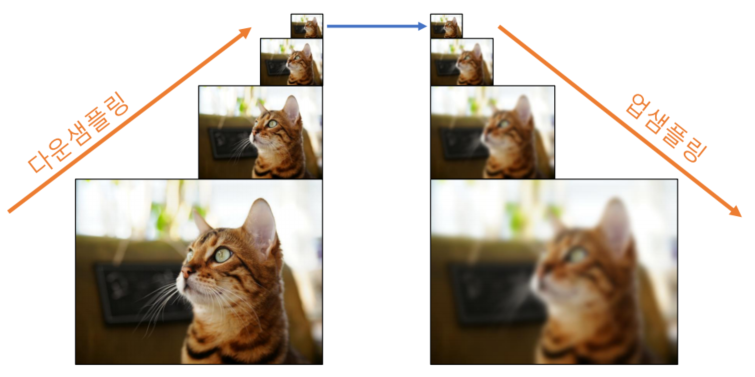

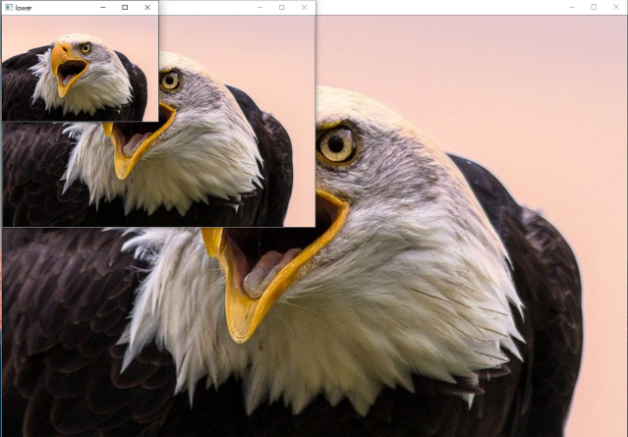

#### 영상 피라미드 다운 샘플링 코드

cv2.pyrDown(src, dst=None, dstsize=None, borderType=None) -> dst

* dstsize : 출력 영상 크기, default : 입력 영상의 가로, 세로 크기의 1/2
* 5x5 크기의 가우시안 필터를 적용하고, 이후에 짝수 행과 열을 제거하여 작은 크기의 영상을 생성함

#### 영상 피라미드 업샘플링 코드

cv2.pyrUp(src, dst=None, dstsize=None, borderType=None) -> dst

* dstsize : 출력 영상 크기, default : 입력 영상의 가로, 세로 크기의 2배

In [4]:
import sys
import numpy as np
import cv2


src = cv2.imread('C:/Users/ky_moon/Desktop/vision/ch05/cat.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

rc = (250, 120, 200, 200)  # rectangle tuple (x, y, w, h)

# 원본 영상에 그리기
cpy = src.copy()
cv2.rectangle(cpy, rc, (0, 0, 255), 2)
cv2.imshow('src', cpy)
cv2.waitKey()

# 피라미드 영상에 그리기
for i in range(1, 4):
    src = cv2.pyrDown(src)  # 다운 샘플링
    cpy = src.copy()
    cv2.rectangle(cpy, rc, (0, 0, 255), 2, shift=i)  # shift : 그리기 좌표값의 축소 비율, 입력 영상의 크기가 줄어들어도 정상적으로 고양이 얼굴에 사각형을 그림
    cv2.imshow('src', cpy)
    cv2.waitKey()
    cv2.destroyWindow('src')

cv2.destroyAllWindows()

## 4. 영상의 회전

### 회전 변환

특정 좌표를 기준으로 영상을 특정 각도만큼 반시계 방향으로 회전시키는 변환

Ex) 문서 인식 OCR 시스템의 경우, 글씨 영상의 수평이 맞아야 인식률이 증가하기 때문에 문서의 회전각도를 측정하여 영상을 적절하게 회전변환 시킨 후 시스템의 입력으로 사용함

<br/>

원점을 기준으로 영상을 반시계 방향으로 theta만큼 회전하는 변환

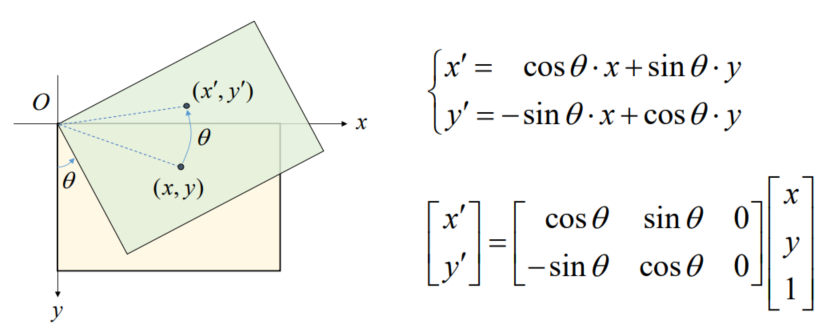

In [ ]:
import sys
import math
import numpy as np
import cv2


src = cv2.imread('C:/Users/ky_moon/Desktop/vision/ch05/tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

rad = 20 * math.pi / 180  # theta(20도를 radian 단위로, 반시계 방향)
aff = np.array([[math.cos(rad), math.sin(rad), 0],
                [-math.sin(rad), math.cos(rad), 0]], dtype=np.float32)  # 어파인 행렬 지정

dst = cv2.warpAffine(src, aff, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


#### 회전 변환 행렬 코드

cv2.getRotationMatrix2D(center, anlge, scale) -> retval

* center : 회전 중심 좌표 (x, y)튜플
* angle : 반시계 방향 회전 각도(degree). 음수면 시계 방향
* scale : 추가적인 확대 비율
* retval : 2 x 3 어파인 변환 실수형 행렬.

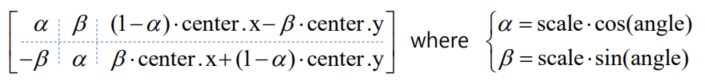

In [ ]:
import sys
import numpy as np
import cv2


src = cv2.imread('C:/Users/ky_moon/Desktop/vision/ch05/tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

cp = (src.shape[1] / 2, src.shape[0] / 2)  # 영상의 중앙을 기준으로 회전함
rot = cv2.getRotationMatrix2D(cp, 20, 1)  # 회전 변환 행렬(반시계 방향으로 20도 회전, scaling x)

dst = cv2.warpAffine(src, rot, (0, 0))  # 원본 영상에 어파인 회전 변환 적용

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()ㅡ

## 5. 투시 변환

어파인 변환보다 자유도가 높은 변환 (perspective transform)

직사각형 형태의 영상을 **임의의 볼록 사각형 형태로 변경** (두 직선의 평행 관계가 깨질 수 있음)

<br/>

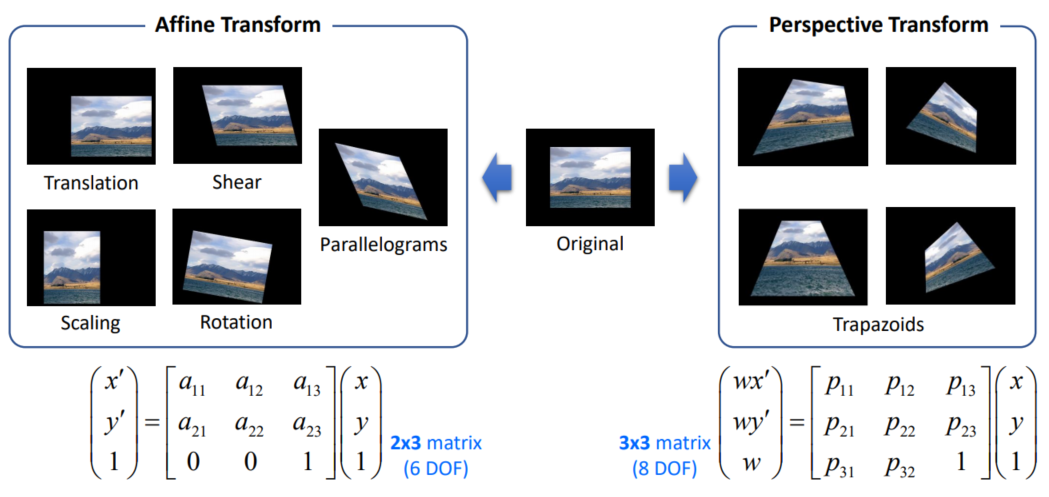

<br/>

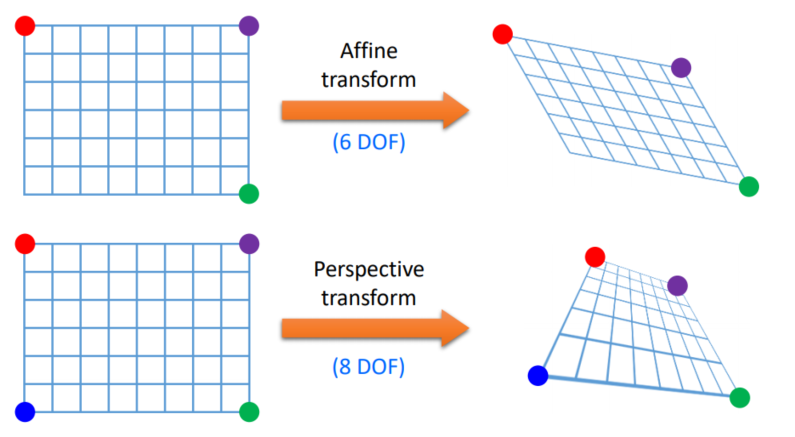
  * DOF : degree of freedom (방정식의 파라미터 개수)
  * 투시 변환은 직선들의 평행관계가 유지되지 않기 때문에 임의의 사각형 형태로 나타남
  * 점 4개의 이동 관계로부터 8개의 방정식을 얻음

동차 좌표계 (homogeneous coordinates) - 좌표 계산 편의를 위해 사용

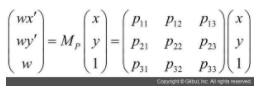

 * w : 결과 영상의 좌표를 표현할 때 사용되는 비례 상수

<br/>

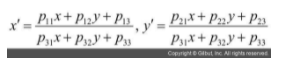

#### 어파인 변환 행렬 코드

cv2.getAffineTransform(src, dst) -> retval

* src : 3개의 원본 좌표점. numpy.ndarray.shape=(3, 2)   ex) np.array([[x1, y1], [x2, y2], [x3, y3]], np.float32)
* dst : 3개의 결과 좌표점
* retval : **2 x 3** 투시 변환 행렬

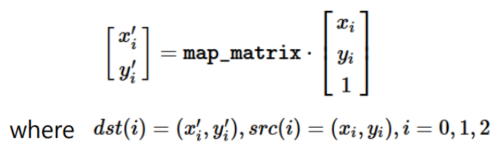

#### 어파인 변환 코드

cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None) -> dst

* src : 입력 영상
* M : 2 x 3 어파인 변환 행렬. 실수형.
* dsize : 결과 영상의 크기. (w, h)튜플. (0, 0)이면 src와 같은 크기
* dst : 출력
* flags : 보간법. default=cv2.INTER_LINEAR
* borderMode : 가장자리 픽셀 확장 방식. default=cv2.BORDER_CONSTANT
* borderValue : cv2.BORDER_CONSTANT일 때 사용하는 상수 값. default=0

#### 투시 변환 행렬 코드

cv2.getPerspectiveTransform(src, dst, solveMethod=None) -> retval

* src : 4개의 원본 좌표점. numpy.ndarray.shape=(4, 2)
* dst : 4개의 결과 좌표점
* retval : **3 x 3** 투시 변환 행렬

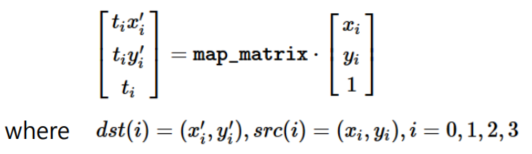

#### 투시 변환 코드

cv2.warpPerspective(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None) -> dst

* M : 3 x 3 투시 변환 실수형 행렬

In [6]:
# 찌그러진 명함 펴기

import sys
import numpy as np
import cv2


src = cv2.imread('C:/Users/ky_moon/Desktop/vision/ch05/namecard.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

w, h = 720, 400  # 출력 영상의 크기 지정 (가로 세로 9:5 비율)
srcQuad = np.array([[325, 307], [760, 369], [718, 611], [231, 515]], np.float32)  # 명함의 꼭지점 좌표 (좌측 상단부터 시계 방향으로)
dstQuad = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)  # 4개 점의 이동 관계로부터 투시 변환 행렬 구하기, 점들이 투시 변환에 의해 어느 위치로 이동하는지
dst = cv2.warpPerspective(src, pers, (w, h))  # 실제 영상을 (w, h) 크기의 결과 영상으로 투시 변환

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


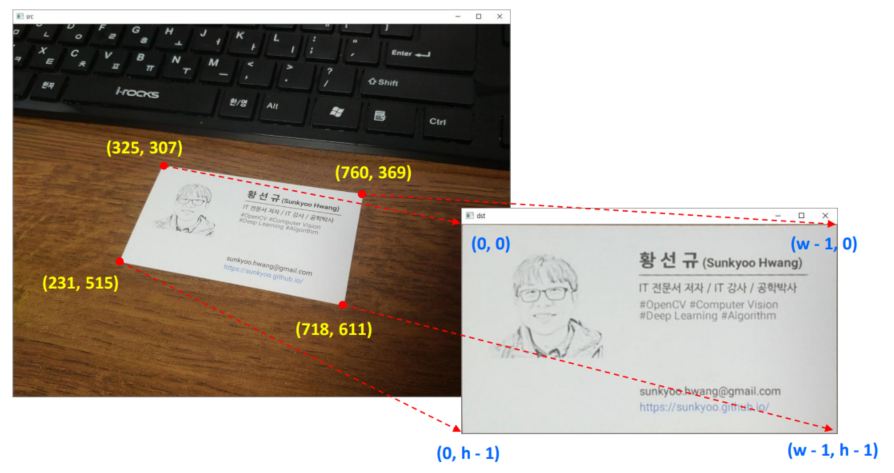

## 6. 리매핑

영상의 **특정 위치 픽셀을 다른 위치에 재배치**. **규칙성 없이** 마음대로 이미지의 모양을 변환하기 때문에 자유도 있는 변화가 가능 (입력 영상을 직선이 아닌 곡선으로 표현할 수 있음)

기하학적 변환을 mapping. **출력 영상의 좌표를 입력 영상의 어느 좌표를 참조해서 가지고 올 것인지를 설정**하여 출력 영상의 모든 픽셀 값을 셋팅해 출력 영상을 만듬. **출력 영상의 x, y 좌표에서 입력 영상의 어느 위치를 참조할 것인지를 나타내는 map x, map y 함수를 정의**.


어파인, 투시 변환을 포함한 다양한 변환을 리매핑으로 표현 가능

dst(x, y) = src(map_x(x, y), map_y(x, y))

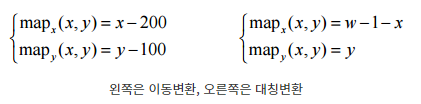

  * 대칭 변환 : x 좌표를 (가로 크기-1-x)로 mapping, y는 그대로
  * 이동 변환 : (x-200)은 입력 영상의 좌표가 x 방향으로(오른쪽으로) 200 이동한다는 의미 (-200 만큼 이동 x), 아래 방향으로는 100 이동

#### 리매핑 코드 

cv2.remap(src, map1, map2, interpolation, dst=None, borderMode=None, borderValue=None) -> dst

* src : 입력 영상
* map1 : 결과 영상의 (x, y) 좌표가 참조할 입력 영상의 x 좌표
* map2 : 결과 영상의 (x, y) 좌표가 참조할 입력 영상의 y 좌표

In [7]:
import sys
import numpy as np
import cv2


src = cv2.imread('C:/Users/ky_moon/Desktop/vision/ch05/tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

h, w = src.shape[:2]

map2, map1 = np.indices((h, w), dtype=np.float32)  # np.indice는 행렬의 인덱스값 반환. y좌표값, x좌표값을 따로따로 행렬의 형태로 변환

# x 좌표에 sin함수를 사용하여 파도처럼 요동치게 만듬 (위아래로 10 픽셀 만큼 요동치게)
map2 = map2 + 10 * np.sin(map1 / 32)  

dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [14]:
map2, map1 = np.indices((h, w), dtype=np.float32)  # 입력 영상의 y, x 좌표값
print('리매핑 이전 x 좌표값 :', map1[:5])
print('리매핑 이전 y 좌표값 :', map2[:5])

리매핑 이전 x 좌표값 : [[  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]]
리매핑 이전 y 좌표값 : [[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [2. 2. 2. ... 2. 2. 2.]
 [3. 3. 3. ... 3. 3. 3.]
 [4. 4. 4. ... 4. 4. 4.]]


In [15]:
map2 = map2 + 10 * np.sin(map1 / 32)  # y 좌표가 사인 함수 값을 더함
print('리매핑 이후 x 좌표값 :', map1[:5])
print('리매핑 이후 y 좌표값 :', map2[:5])

리매핑 이후 x 좌표값 : [[  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]]
리매핑 이후 y 좌표값 : [[ 0.          0.31244913  0.62459314 ...  8.707346    8.856742
   8.99749   ]
 [ 1.          1.3124491   1.6245931  ...  9.707346    9.856742
   9.99749   ]
 [ 2.          2.3124492   2.6245933  ... 10.707346   10.856742
  10.99749   ]
 [ 3.          3.3124492   3.6245933  ... 11.707346   11.856742
  11.99749   ]
 [ 4.          4.312449    4.6245933  ... 12.707346   12.856742
  12.99749   ]]


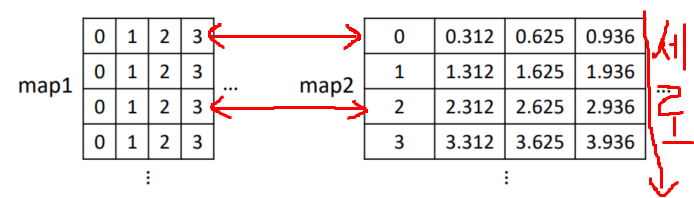

일종의 meshgrid 형태

## 문서 스캐너

1. 마우스로 문서 모서리를 선택하고 이동

2. 키보드 enter키 인식

3. 문서 영상을 직사각형 형태로 똑바로 펴기 (투시 변환)

In [ ]:
import sys
import numpy as np
import cv2


def drawROI(img, corners):
    cpy = img.copy()
    
    # 색 지정
    c1 = (192, 192, 255)
    c2 = (128, 128, 255)
    
    # 4개의 점에 대해 반지름 25의 핑크색 원을 그림(원 내부를 색깔로 채움)
    for pt in corners:  
        cv2.circle(cpy, tuple(pt), 25, c1, -1, cv2.LINE_AA)
    
    # 선택된 4개의 모서리점을 잇는 직선 4개를 그려 사각형을 표현
    # 점들의 좌표가 ndarray 형식이기 때문에 tuple로 변환해주어야 함
    cv2.line(cpy, tuple(corners[0]), tuple(corners[1]), c2, 2, cv2.LINE_AA)  
    cv2.line(cpy, tuple(corners[1]), tuple(corners[2]), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[2]), tuple(corners[3]), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[3]), tuple(corners[0]), c2, 2, cv2.LINE_AA)
    
    # 원본 이미지와 그림을 그려놓은 이미지를 3:7 비율로 합성
    disp = cv2.addWeighted(img, 0.3, cpy, 0.7, 0) # 전체 픽셀에 대한 연산이라 시간이 걸릴 수 있음

    return disp


def onMouse(event, x, y, flags, param):  
    global srcQuad, dragSrc, ptOld, src
    
    # 마우스가 눌려져 있을 때
    if event == cv2.EVENT_LBUTTONDOWN:
        for i in range(4):
            # 클릭한 부분(x, y)이 4개 모서리점의 원 안에 들어가 있는 지 판별
            if cv2.norm(srcQuad[i] - (x, y)) < 25: # 클릭한 부분이 특정 모서리점의 원 안에 포함되어 있을 때만 드래그가 가능하도록
                dragSrc[i] = True  # 드래그 시작
                ptOld = (x, y)  # 마우스를 움직일 때 마다 원이 이동할 수 있도록 (이동하는 변위를 알기 위해 재사용)
                break
    
    # 드래그가 끝나면 False로 초기화
    if event == cv2.EVENT_LBUTTONUP:
        for i in range(4):
            dragSrc[i] = False
    
    # mousemove를 마우스가 눌려져 있을때만 체크
    if event == cv2.EVENT_MOUSEMOVE:
        for i in range(4):
            
            # 어떤 점을 드래그하고 있으면
            if dragSrc[i]:
                dx = x - ptOld[0]  # 현재 좌표 - 이전 좌표 (이동하는 변위)
                dy = y - ptOld[1]

                srcQuad[i] += (dx, dy)  # 이동

                cpy = drawROI(src, srcQuad) # 이동할때 마다 화면에 반영
                cv2.imshow('img', cpy)
                ptOld = (x, y)  # 현재 점으로 세팅
                break


# 입력 이미지 불러오기
src = cv2.imread('C:/Users/ky_moon/Desktop/vision/ch05/scanned.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()

# 입력 영상 크기 및 출력 영상 크기
h, w = src.shape[:2]

# 문서를 똑바로 편 이미지의 가로, 세로 크기
dw = 500
dh = round(dw * 297 / 210)  # A4 용지 크기: 210x297cm

# 모서리 점들의 좌표(반시계 방향), 드래그 상태 여부
# 선택하려고하는 모서리점 4개의 점을 저장, 마우스 이벤트를 처리하면 변경
srcQuad = np.array([[30, 30], [30, h-30], [w-30, h-30], [w-30, 30]], np.float32)  # 초기치(선택 하려는 포인트가 영상 끝 모서리에 위치하지 않게)

# 출력 영상의 모서리 위치 지정
dstQuad = np.array([[0, 0], [0, dh-1], [dw-1, dh-1], [dw-1, 0]], np.float32)  
dragSrc = [False, False, False, False]  # 4개의 점 중 어떤 점을 drag하는 지 상태 정보를 저장

# 모서리점, 사각형 그리기
# 입력 영상에 선택한 점의 좌표를 전송. display용
disp = drawROI(src, srcQuad)

cv2.imshow('img', disp)
cv2.setMouseCallback('img', onMouse)  

while True:
    key = cv2.waitKey()
    if key == 13:  # ENTER 키
        break  # while loop를 빠져 나옴
    elif key == 27:  # ESC 키
        cv2.destroyWindow('img')
        sys.exit()  # 종료

# 투시 변환
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh), flags=cv2.INTER_CUBIC)

# 결과 영상 출력
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

**초기 화면** 

선택 영역에 해당하는 원이 ([30, 30], [30, h-30], [w-30, h-30], [w-30, 30]] 위치)

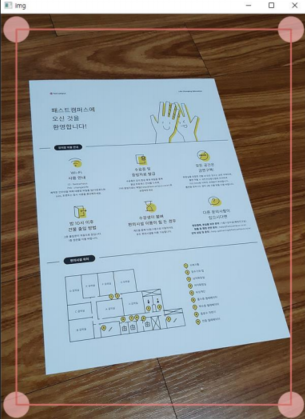

**결과 영상**

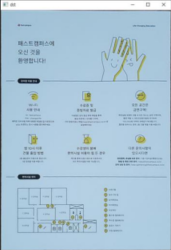